<a href="https://colab.research.google.com/github/hdang20/news_article_summarization/blob/main/News_article_summarization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount this Google Colab file with your Google Drive. Please make sure your Drive has more than 9 GB available

In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Set up PEGASUS environment

In [ ]:
!git clone https://github.com/google-research/pegasus
%cd pegasus
!export PYTHONPATH=.


Cloning into 'pegasus'...
remote: Enumerating objects: 175, done.
remote: Total 175 (delta 0), reused 0 (delta 0), pack-reused 175
Receiving objects: 100% (175/175), 354.16 KiB | 495.00 KiB/s, done.
Resolving deltas: 100% (58/58), done.
/content/pegasus


In [ ]:
!sudo apt-get install gcc python-dev python-setuptools libffi-dev
!sudo apt-get install python-pip
!sudo pip install gsutil

Reading package lists... Done
Building dependency tree       
Reading state information... Done
python-dev is already the newest version (2.7.15~rc1-1).
gcc is already the newest version (4:7.4.0-1ubuntu2.3).
gcc set to manually installed.
The following additional packages will be installed:
  python-pkg-resources
Suggested packages:
  python-setuptools-doc
The following NEW packages will be installed:
  libffi-dev python-pkg-resources python-setuptools
0 upgraded, 3 newly installed, 0 to remove and 14 not upgraded.
Need to get 613 kB of archives.
After this operation, 2,336 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-pkg-resources all 39.0.1-2 [128 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-setuptools all 39.0.1-2 [329 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libffi-dev amd64 3.2.1-8 [156 kB]
Fetched 613 kB in 0s (5,763 kB/s)
debconf: unable to initialize frontend: Dialog
debconf

In [ ]:
!mv '/content/pegasus' '/content/gdrive/My Drive'

In [ ]:
%cd '/content/gdrive/My Drive/pegasus'
!mkdir ckpt
%cd ckpt
!mkdir pegasus_ckpt
%cd '/content/gdrive/My Drive/pegasus/'
!gsutil cp -r gs://pegasus_ckpt/checkpoint ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.model ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.vocab ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/model.ckpt-1500000.meta ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/model.ckpt-1500000.index ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/model.ckpt-1500000.data-00000-of-00001 ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/cnn_dailymail ckpt/pegasus_ckpt
!gsutil cp -r gs://pegasus_ckpt/newsroom ckpt/pegasus_ckpt



/content/gdrive/My Drive/pegasus/ckpt
/content/gdrive/My Drive/pegasus
Copying gs://pegasus_ckpt/checkpoint...
- [1 files][   93.0 B/   93.0 B]                                                
Operation completed over 1 objects/93.0 B.                                       
Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.model...
- [1 files][  1.8 MiB/  1.8 MiB]                                                
Operation completed over 1 objects/1.8 MiB.                                      
Copying gs://pegasus_ckpt/c4.unigram.newline.10pct.96000.vocab...
- [1 files][  1.7 MiB/  1.7 MiB]                                                
Operation completed over 1 objects/1.7 MiB.                                      
Copying gs://pegasus_ckpt/model.ckpt-1500000.meta...
\ [1 files][220.4 MiB/220.4 MiB]                                                
Operation completed over 1 objects/220.4 MiB.                                    
Copying gs://pegasus_ckpt/model.ckpt-1500000.index..

In [2]:
%cd '/content/gdrive/My Drive/pegasus/'
!pip3 install -r requirements.txt
!pip3 install tensorflow-datasets==3.0.0
!pip3 install tfds-nightly==3.1.0.dev202006230105

/content/gdrive/My Drive/pegasus
     |████████████████████████████████| 71kB 6.7MB/s 
     |████████████████████████████████| 1.1MB 16.3MB/s 
     |████████████████████████████████| 8.6MB 24.3MB/s 
     |████████████████████████████████| 1.4MB 40.1MB/s 
     |████████████████████████████████| 3.7MB 47.2MB/s 
     |████████████████████████████████| 411.0MB 42kB/s 
     |████████████████████████████████| 110.5MB 45kB/s 
     |████████████████████████████████| 194kB 49.1MB/s 
     |████████████████████████████████| 983kB 42.3MB/s 
     |████████████████████████████████| 368kB 53.0MB/s 
     |████████████████████████████████| 5.3MB 41.7MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 348kB 38.4MB/s 
     |████████████████████████████████| 655kB 39.3MB/s 
     |████████████████████████████████| 358kB 51.2MB/s 
     |████████████████████████████████| 3.8MB 44.2MB/s 
     |████████████████████████████████| 512kB 53.7MB/s 
     |█████████████

In [3]:
%cd /content/gdrive/My Drive/
!pip3 install -e pegasus
%cd /content/gdrive/My Drive/pegasus/

/content/gdrive/My Drive
Obtaining file:///content/gdrive/My%20Drive/pegasus
  Running setup.py develop for pegasus
/content/gdrive/My Drive/pegasus


Make folder 'newsroom_cnn_dailymail' in directory '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/'

In [ ]:
%cd '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/'
!mkdir newsroom_cnn_dailymail

/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt


FINE-TUNING MODEL PEGASUS/NEWSROOM_CNN_DAILYMAIL:

Paste the code snippet below to file '/content/gdrive/MyDrive/pegasus/pegasus/params/public_params.py'




```
@registry.register("new_params")
def my_param(param_overrides):
  return transformer_params(
      {
          "train_pattern": "tfds:cnn_dailymail/plain_text-train",
          "dev_pattern": "tfds:cnn_dailymail/plain_text-validation",
          "test_pattern": "tfds:cnn_dailymail/plain_text-test",
          "max_input_len": 1024,
          "max_output_len": 128,
          "train_steps": 210000,
          "learning_rate": 0.00001,
          "batch_size": 1,
      }, param_overrides)
```



Code for fine-tuning PEGASUS/NEWSROOM_CNN_DAILYMAIL model. After sucessfully finishing this code, the model will be placed in directory '/content/gdrive/MyDrive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail'

Note: To save time, you can use the model we already fine-tuned and set up as describing in DEMO section.

In [ ]:
!python pegasus/bin/train.py --params=new_params \
--param_overrides=vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model, batch_size=1 \
--train_init_checkpoint=ckpt/pegasus_ckpt/newsroom/model.ckpt-190000 \
--model_dir=ckpt/pegasus_ckpt/newsroom_cnn_dailymail --save_checkpoints_steps=210000 --keep_checkpoint_max=1

DEMO: 

Input an article, obtain two summaries generated from our implementation model and PEGASUS original model

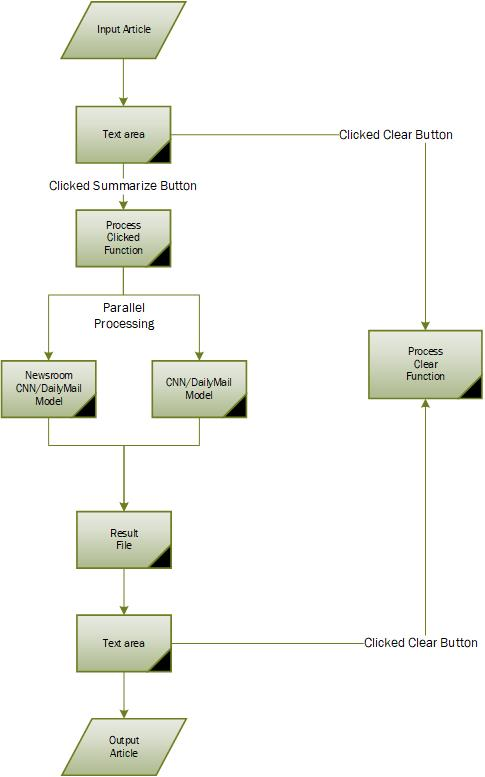

Download 'Download.zip' file from [here](https://exchangelabsgmu-my.sharepoint.com/:u:/g/personal/hdang20_masonlive_gmu_edu/ERbzShWdXQFHpumMcFMX7joBPn2NOij4HbXj6msad6Zclg?e=XflV3k) and upload to '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/'

In [ ]:
!unzip '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/Downloads.zip' -d '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/'

Archive:  /content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/Downloads.zip
  inflating: /content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/model.ckpt-210000.index  
  inflating: /content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/model.ckpt-210000.meta  
  inflating: /content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/model.ckpt-210000.data-00000-of-00001  


Paste two snippets below to file '/content/gdrive/MyDrive/pegasus/pegasus/params/public_params.py'



```
save_path1 = "tfrecord:/content/gdrive/My Drive/pegasus/pegasus/data/testdata/test_pattern_1.tfrecord"
@registry.register("cnn_dailymail")
def cnn_dailymail(param_overrides):
  return transformer_params(
      {
          "train_pattern": save_path1,
          "dev_pattern": save_path1,
          "test_pattern": save_path1,
          "max_input_len": 1024,
          "max_output_len": 128,
          "train_steps": 210000,
          "learning_rate": 0.001,
          "batch_size": 8,
      }, param_overrides)

save_path2 = "tfrecord:/content/gdrive/My Drive/pegasus/pegasus/data/testdata/test_pattern_2.tfrecord"
@registry.register("newsroom_cnn_dailymail_transformer")
def newsroom_cnn_dailymail_transformer(param_overrides):
   return transformer_params(
       {
          "train_pattern": save_path2, 
          "dev_pattern": save_path2, 
          "test_pattern": save_path2, 
          "max_input_len": 1024,
          "max_output_len": 128,
          "train_steps": 8000,
          "learning_rate": 0.0001,
          "batch_size": 8,
       }, param_overrides)
```



Create two blank txt files

In [ ]:
%cd '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/'
!touch 'predictions-210000-.dev.txt'
%cd '/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/cnn_dailymail/'
!touch 'predictions-210000-.dev.txt'

/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail


Run the code below. After that, paste the article to Input Article box. Click 'Summarize' and wait for 2.5 mins to obtain two summaries.

Please note the above time is achieved using GPU V100.

In [4]:
import pandas as pd
import os
import tensorflow as tf
import ipywidgets as widgets
from ipywidgets import Layout, Textarea, Box, VBox, Button, Text
from IPython.display import display
import multiprocessing as mp


def Parallel(num):
  if num == 1:
    os.system('python pegasus/bin/evaluate.py --params=newsroom_cnn_dailymail_transformer \
          --param_overrides=vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model,batch_size=1,beam_size=8,beam_alpha=0.8 \
          --model_dir=ckpt/pegasus_ckpt/newsroom_cnn_dailymail/model.ckpt-210000') 
  if num == 2:
    os.system('python pegasus/bin/evaluate.py --params=cnn_dailymail \
          --param_overrides=vocab_filename=ckpt/pegasus_ckpt/c4.unigram.newline.10pct.96000.model,batch_size=1,beam_size=8,beam_alpha=0.8 \
          --model_dir=ckpt/pegasus_ckpt/cnn_dailymail/model.ckpt-210000')


def clicked(arg):
    input_dict = dict(
    inputs=[input.value],
    targets=[""]
    )

    save_path1 = "/content/gdrive/My Drive/pegasus/pegasus/data/testdata/test_pattern_1.tfrecord"
    data = pd.DataFrame(input_dict)
    with tf.io.TFRecordWriter(save_path1) as writer:
        for row in data.values:
            inputs, targets = row[:-1], row[-1]
            example = tf.train.Example(
                features=tf.train.Features(
                    feature={
                        "inputs": tf.train.Feature(bytes_list=tf.train.BytesList(value=[inputs[0].encode('utf-8')])),
                        "targets": tf.train.Feature(bytes_list=tf.train.BytesList(value=[targets.encode('utf-8')])),
                    }
                )
            )
            writer.write(example.SerializeToString())
    
    input_dict = dict(
    inputs=[input.value],
    targets=[""]
    )
    save_path2 = "/content/gdrive/My Drive/pegasus/pegasus/data/testdata/test_pattern_2.tfrecord"
    data = pd.DataFrame(input_dict)
    with tf.io.TFRecordWriter(save_path2) as writer:
        for row in data.values:
            inputs, targets = row[:-1], row[-1]
            example = tf.train.Example(
                features=tf.train.Features(
                    feature={
                        "inputs": tf.train.Feature(bytes_list=tf.train.BytesList(value=[inputs[0].encode('utf-8')])),
                        "targets": tf.train.Feature(bytes_list=tf.train.BytesList(value=[targets.encode('utf-8')])),
                    }
                )
            )
            writer.write(example.SerializeToString())
      
    pool = mp.Pool(2)
    pool.map(Parallel,[1,2])
    pool.close()

    

    result1=''
    with open('/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/newsroom_cnn_dailymail/predictions-210000-.dev.txt') as f1:
      next(f1)
      for line in f1:
        result1+=line
    
    
    result=''
    with open('/content/gdrive/My Drive/pegasus/ckpt/pegasus_ckpt/cnn_dailymail/predictions-210000-.dev.txt') as f:
      next(f)
      for line in f:
        result+=line

    text.value=result 
    text1.value=result1


    
def clear(arg):
    text.value=''
    text1.value=''
    input.value=''


  

        
Title = Button(description= "Input Article",disabled=True, layout=Layout(flex='1 1 auto', width='auto'),button_style='info')
Title.style.button_color = 'DarkBlue'
input = Textarea(placeholder= "Put Article Here",layout=Layout(height = '200px',flex='1 1 auto', width='auto'))

Summarize = Button(description= "Summarize")
Summarize.on_click(clicked)

text1 = Textarea(layout=Layout(height = '150px',flex='1 1 auto', width='50%'))
text = Textarea(layout=Layout(height = '150px',flex='1 1 auto', width='50%'))
items_auto = [text1, text]

Title_OUR= Button(description= "PEGASUS/NEWSROOM_CNN_DailyMail model (Our implementation)",disabled=True, layout=Layout(flex='1 1 auto', width='50%'),button_style='info')
Title_OUR.style.button_color = 'DarkBlue'
Title_CNN = Button(description= "PEGASUS/CNN_DailyMail model",disabled=True, layout=Layout(flex='1 1 auto', width='50%'),button_style='info')
Title_CNN.style.button_color = 'DarkBlue'
items_text = [Title_OUR,Title_CNN ]



# Items flex proportionally to the weight

box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch',
                    width='100%')
box_auto = Box(children=items_auto, layout=box_layout)
box_text = Box(children=items_text, layout=box_layout)

button_download = Button(description = 'Clear')   
button_download.on_click(clear)

VBox([Title,input,Summarize,box_text,box_auto,button_download])












Sample: Input Article



Prime Minister Narendra Modi and President Ashraf Ghani on Monday discussed the evolving security situation in the region against the backdrop of a spike in terrorist violence in Afghanistan.
The two leaders had a phone conversation and exchanged greetings on the occasion of Eid-ul-Azha. Ghani thanked Modi for timely supply of food and medical assistance to meet Afghanistan’s requirements, according to an official statement.
“The two leaders also exchanged views on the evolving security situation in the region and other areas of mutual bilateral interest,” the statement said, adding Modi had reiterated India’s commitment to the Afghan people “in their quest for a peaceful, prosperous and inclusive Afghanistan”.
The phone conversation coincided with a meeting in Kabul between Afghan National Security Adviser Hamdullah Mohib and Indian ambassador Vinay Kumar.
Kumar spoke of India’s continued help for Afghanistan to counter the Covid-19 pandemic, and Mohib thanked India for its support and affirmed Afghanistan’s “strong commitment to the bilateral partnership”, the Afghan National Security Council said.
The contacts between the two sides came a week after Chinese foreign minister Wang Yi chaired a virtual meeting with his counterparts from Afghanistan, Nepal and Pakistan and called for “four-party cooperation”, including on the China-Pakistan Economic Corridor (CPEC).
Wang also said Kathmandu and Kabul should learn from China-Pakistan cooperation and the four countries should work together to extend CPEC to Afghanistan.
The meeting, held against the backdrop of the China-India border standoff, was viewed warily in New Delhi. India also has serious concerns about the spike in terrorist violence in Afghanistan and the role being played by Pakistan in the Afghan peace process.
Days after a report by a UN expert team monitoring the implementation of sanctions against banned terror groups and individuals said almost 6,500 Pakistani terrorists were present in Afghanistan, acting Afghan interior minister Masoud Andarabi said on Monday that the new leader of the Khorasan unit of Islamic State was a member of the Pakistan-based Haqqani Network.
“Shahab Almahajir, the newly appointed leader of Islamic State of Khorasan Province-ISKP is a Haqani member. Haqani & the Taliban carry out their terrorism on a daily basis across Afg & when their terrorist activities [do] not suit them politically they rebrand it under ISKP,” Andarabi tweeted.